# Rejection sampling

Suppose we want to draw samples from a PDF $f(x)$. In practice, we usually know $f(x)$ only up to a normalizing factor, i.e., $f'(x)=C f(x)$. In this scenario, rejection sampling works as follows.

1. Choose a proposal distribution $g(x)$ which we know how to draw samples from.
2. Find a positive real number $M$ such that $M g(x) \ge f'(x) ~\forall x$.
3. Draw samples $x'$ from $g$, and accept them with probability $\frac{f'(x)}{Mg(x)}$.

To prove that it works, let us write down the Bayes theorem for the probability distribution of accepted samples. Let $x$ be the proposed samples and let $A$ represent acceptance. Then,

$P[x|A] = \frac{P[A|x] P[x]}{P[A]}$

Here, $P[A|x]=\frac{f'(x)}{Mg(x)}$ is the acceptance probability of a proposed sample, and $P[x]=g(x)$ is the proposal distribution. $P[A]$ is a normalizing factor. Hence,

$P[x|A] = \frac{\frac{f'(x)}{Mg(x)} \times g(x)}{\int \frac{f'(x)}{Mg(x)} \times g(x) dx} = \frac{f'(x)}{C}=f(x)$

Now let us try an example.

In [85]:
import jax.numpy as np
import matplotlib.pyplot as plt
import jax

@jax.jit
def fprime(x):
    return (1-np.abs(x)) * np.heaviside(1-np.abs(x), 0)

C = 1.0

@jax.jit
def g(x):
    # Normal distribution with sigma=1/2
    return np.exp(-x**2/2*4) / np.sqrt(2*np.pi/4)

M = 1.3

Text(0.5, 0, 'x')

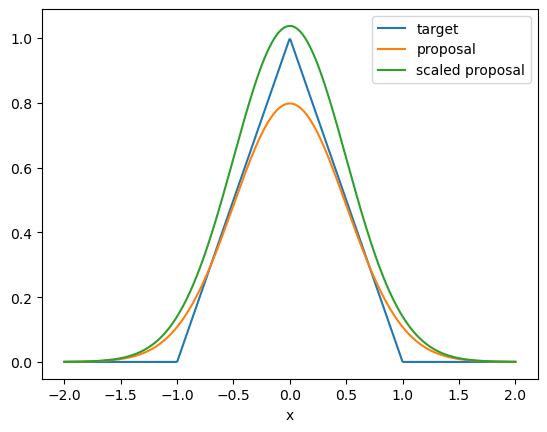

In [72]:
x = np.linspace(-2, 2, 500)
plt.plot(x, fprime(x), label="target")
plt.plot(x, g(x), label="proposal")
plt.plot(x, M*g(x), label="scaled proposal")
plt.legend()
plt.xlabel("x")

In [91]:
import numpy.random as random

def sample(Nprop):
    samples = []
    for i in range(Nprop):
        x = random.randn() / 2
        prob = fprime(x) / M / g(x)
        if random.rand() < prob:
            samples.append(x)
    return samples

In [94]:
xs = sample(10000)

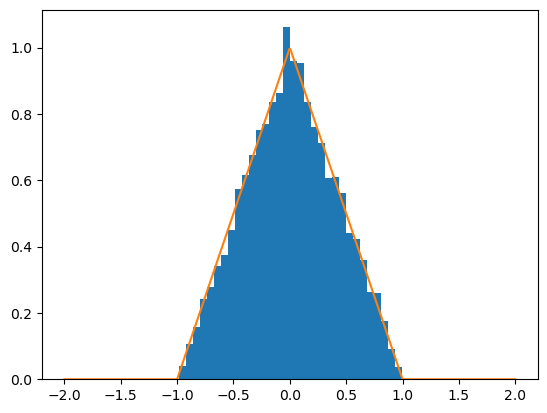

In [95]:
plt.hist(xs, density=True, bins=32)
x = np.linspace(-2, 2, 500)
plt.plot(x, fprime(x), label="target norm")

The main advantage of rejection sampling is its simplicity and the fact that we don't need the target distribution to be normalized. If the proposal distribution is very close to the true distribution, it can be very efficient. Also, rejection sampling provides uncorrelated samples.

OTOH, if the proposal distribution is bad, the sampling will be very inefficient. For most real world problems it is very difficult to obtain such a proposal distribution. 